## PREDICTING AGE AT DISGNOSIS FOR BREAST CANCER PATIENTS, USING NHIS 2022

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Set workspace features

In [3]:
#set workspace features
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.style.use = ('seaborn-whitegrid')

### Read in data

In [4]:
nhis_2022 = pd.read_csv("G:/My Drive/Programming/Data Science/DATA SETS/NHIS/NHIS 2022/nhis_adult_2022_data.csv")

In [5]:
#number of rows, and column
nhis_2022.shape

(27651, 637)

In [6]:
#view first 10 observations
nhis_2022.head(10)

,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,SHOTTYPE1_A,CEVOTELC_A,CEMMETNG_A,CEVOLUN2_A,CEVOLUN1_A,HITTEST_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,2,7,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,4548.583,H059086,1.92
1,4,14,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,7087.431,H054049,10.30
2,4,14,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,8125.516,H055201,9.36
3,4,11,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,7837.390,H044893,3.66
4,1,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3,1,1,10,1,10234.356,H043149,0.69
5,1,14,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,8825.461,H047436,9.76
6,1,14,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,14906.460,H053192,11.00
7,1,5,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3,1,1,10,1,13227.509,H030727,1.40
8,1,14,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,17795.731,H001442,8.26
9,1,8,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,10,1,9851.286,H035086,2.44


### Refine data

In [7]:
#subset selected columns
selected_columns = ['SEX_A', 'BREASCAN_A', 'BREASAGETC_A', 'AGEP_A', 'NOTCOV_A', 'PHSTAT_A', 'ANXFREQ_A', 'ANXMED_A', 'DEPFREQ_A', 'DEPMED_A',
              'EDUCP_A', 'MARITAL_A', 'HISPALLP_A', 'PCNTLT18TC', 'LSATIS4_A', 'HYPEV_A', 'CHLEV_A', 'CHDEV_A', 'ANGEV_A', 'MIEV_A', 
              'STREV_A', 'ASEV_A', 'DIBEV_A', 'COPDEV_A', 'ARTHEV_A', 'DEMENEV_A', 'ANXEV_A', 'DEPEV_A', 'HEIGHTTC_A', 'WEIGHTLBTC_A',
              'MODMIN_A', 'VIGMIN_A']
nhis_2022_abridged = nhis_2022[selected_columns]
nhis_2022_abridged.head(15)



,SEX_A,BREASCAN_A,BREASAGETC_A,AGEP_A,NOTCOV_A,PHSTAT_A,ANXFREQ_A,ANXMED_A,DEPFREQ_A,DEPMED_A,...,DIBEV_A,COPDEV_A,ARTHEV_A,DEMENEV_A,ANXEV_A,DEPEV_A,HEIGHTTC_A,WEIGHTLBTC_A,MODMIN_A,VIGMIN_A
0,1,NaN,NaN,85,2,2,4,2,5,2,...,2,2,2,2,2,2,68,148,10.0,NaN
1,1,2.0,NaN,64,2,3,4,2,5,2,...,2,2,2,2,2,2,74,235,120.0,60.0
2,2,NaN,NaN,37,2,3,3,1,4,2,...,1,1,2,2,1,2,69,218,30.0,60.0
3,2,NaN,NaN,72,2,2,5,2,5,2,...,2,2,2,2,2,2,64,240,NaN,NaN
4,2,NaN,NaN,84,2,2,4,2,5,2,...,2,2,1,2,2,2,66,183,NaN,NaN
5,2,NaN,NaN,74,2,2,5,2,5,2,...,2,2,1,2,2,2,65,170,NaN,NaN
6,2,NaN,NaN,31,2,1,3,2,5,2,...,2,2,2,2,2,2,69,156,60.0,45.0
7,1,NaN,NaN,80,2,2,2,2,3,2,...,2,1,2,2,2,2,68,160,NaN,NaN
8,2,NaN,NaN,42,2,2,5,2,5,2,...,2,2,2,2,2,2,68,997,NaN,NaN
9,2,1.0,75.0,81,2,3,4,2,5,2,...,2,2,1,2,2,2,68,170,NaN,NaN


SEX_A: 1=male, 2=female, 7-9 = missing <br>
BREASCAN_A: 1=yes, 2=no, 7-9 = missing <br>
BREASAGETC_A: 18=18yrs or younger, 19-84=19-84yrs, 85=85yrs and above, 97-99 = missing <br>
AGEP_A: 18-84=18-84yrs, 85=85yrs and above, 97-99 = missing <br>
NOTCOV_A: 1=uninsured, 2=insured, 7-9 = missing <br>
PHSTAT_A: 1=excellent, 2=v. good, 3=good, 4=fair, 5=poor, 7-9 = missing <br>
ANXFREQ_A: 1=daily, 2=weekly, 3=monthly, 4=a few times a yr, 5=never, 7-9 = missing <br>
ANXMED_A: 1=yes, 2=no, 7-9 = missing <br>
DEPFREQ_A: 1=daily, 2=weekly, 3=monthly, 4=a few times a yr, 5=never, 7-9 = missing <br>
DEPMED_A: 1=yes, 2=no, 7-9 = missing <br>
EDUCP_A: 00=never attended, 01=grade 1-11, 02=12th grade no diploma, 03=GED or equivalent, 04=high school graduate, 05= some college no degree, 06 & 07 =associate degree, 08=bachelor's, 09=master's, 10, professional/doctorate, 97-99 = missing <br>
MARITAL_A: 1=married, 2=living with a partner together as an unmarried couple, 3=neither, 7-9 = missing <br>
HISPALLP_A: 1=Hisp, 2=NHWhite, 3=NHBlack, 4=NHAsian, 5-7=Others, 97-99=missing <br>
PCNTLT18TC (Number of persons under 18 in household):  0=0 child, 1=1 child, 2=2 children, 3=3+ children <br>
LSATIS4_A (Life satisfaction): 1=v. satisfied, 2=satisfied, 3=dissatisfied, 4=v. dissatisfied <br>
HYPEV_A (ever had hypertension): 1=Yes, 2=No, 7-9=missing <br>
CHLEV_A (ever had high cholesterol): 1=Yes, 2=No, 7-9=missing <br>
CHDEV_A (ever had coronary heart disease): 1=Yes, 2=No, 7-9=missing <br>
ANGEV_A (ever had angina): 1=Yes, 2=No, 7-9=missing <br>
MIEV_A (ever had a heart attack): 1=Yes, 2=No, 7-9=missing <br>
STREV_A (ever had stroke): 1=Yes, 2=No, 7-9=missing <br>
ASEV_A (ever had asthma): 1=Yes, 2=No, 7-9=missing <br>
DIBEV_A (ever had diabetes): 1=Yes, 2=No, 7-9=missing <br>
COPDEV_A (ever had COPD): 1=Yes, 2=No, 7-9=missing <br>
ARTHEV_A (ever had arthritis): 1=Yes, 2=No, 7-9=missing <br>
DEMENEV_A (ever had dementia): 1=Yes, 2=No, 7-9=missing <br>
ANXEV_A (ever had anxiety): 1=Yes, 2=No, 7-9=missing <br>
DEPEV_A (ever had depression): 1=Yes, 2=No, 7-9=missing <br>
HEIGHTTC_A (height in inches): 96-99=missing <br>
WEIGHTLBTC_A (weight in pounds): 996-999=missing <br>
MODMIN_A (moderate physical activity duration in mins): 996-999=missing <br>
VIGMIN_A (vigorous physical activity duration in mins): 996-999=missing <br>

In [8]:
#write a function to rename columns, recode the categorical ones and attach laebls
def modify_columns(df, renamed_cols, recoded_cols):
    df=df.rename(columns=renamed_cols) #rename the columns

    for new_name, recoded in recoded_cols.items():
        df[new_name] = df[new_name].replace(recoded)
    return df

In [9]:
new_name = {
    'SEX_A': 'sex', 
    'BREASCAN_A': 'bc_history', 
    'BREASAGETC_A': 'age_at_dx', 
    'AGEP_A': 'age_at_survey', 
    'NOTCOV_A': 'health_insurance', 
    'PHSTAT_A': 'self_rated_health', 
    'ANXFREQ_A': 'anxiety_frequency', 
    'ANXMED_A': 'anxiety_medication', 
    'DEPFREQ_A': 'depression_frequency', 
    'DEPMED_A': 'depression_medication',
    'EDUCP_A': 'education_level', 
    'MARITAL_A': 'marital_status',
    'HISPALLP_A': 'race_ethnicity',
    'PCNTLT18TC': 'child_in_HH',
    'LSATIS4_A': 'life_sat',
    'MODMIN_A': 'mod_pa_min',
    'VIGMIN_A': 'vig_pa_min'
}

recode = {'sex': {1:'male', 2:'female', 7:np.nan, 8:np.nan, 9:np.nan},
          'bc_history' : {1:'yes', 2:'no', 7:np.nan, 8:np.nan, 9:np.nan},
          'age_at_dx': {97:np.nan, 98:np.nan, 99:np.nan},
          'age_at_survey': {97:np.nan, 98:np.nan, 99:np.nan},
          'health_insurance': {1:'uninsured', 2:'insured', 7:np.nan, 8:np.nan, 9:np.nan},
          'self_rated_health': {1:'excellent', 2:'v.good', 3:'good', 4:'fair', 5:'poor',  7:np.nan, 8:np.nan, 9:np.nan},
          'anxiety_frequency': {1:'daily', 2:'weekly', 3:'monthly', 4:'few times a yr', 5:'never',  7:np.nan, 8:np.nan, 9:np.nan},
          'anxiety_medication': {1:'yes', 2:'no', 7:np.nan, 8:np.nan, 9:np.nan},
          'depression_frequency': {1:'daily', 2:'weekly', 3:'monthly', 4:'few times a yr', 5:'never',  7:np.nan, 8:np.nan, 9:np.nan},
          'depression_medication': {1:'yes', 2:'no', 7:np.nan, 8:np.nan, 9:np.nan},
          'education_level': {0:'n/attended', 1:'less than HS', 2:'less than HS', 3:'GED/HS', 4:'GED/HS', 5:'some college', 
                              6:'some college', 7:'some college', 8:'college degree', 9:'graduate degree', 10:'graduate degree',
                              97:np.nan, 98:np.nan, 99:np.nan},
          'marital_status': {1:'currently married', 2:'currently not married', 3:'currently not married', 7:np.nan, 8:np.nan, 9:np.nan},
          'race_ethnicity': {1:'Hispanic', 2:'NHWhite', 3:'NHBlack', 4:'NHAsian', 5:'Others', 6:'Others', 7:'Others', 97:np.nan, 
                             98:np.nan, 9:np.nan},
          'child_in_HH': {0:'no child', 1:'1 child', 2:'2 ch or more', 3:'2 ch or more', 8:np.nan},
          'life_sat': {1:'v. satisfied', 2:'satisfied', 3:'dissatisfied', 4:'v. dissatisfied',  7:np.nan, 8:np.nan, 9:np.nan},
          'mod_pa_min': {996:np.nan, 997:np.nan, 998:np.nan, 999:np.nan},
          'vig_pa_min': {996:np.nan, 997:np.nan, 998:np.nan, 999:np.nan},
          'HYPEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'CHLEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'CHDEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'ANGEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'MIEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'STREV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'ASEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'DIBEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'COPDEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'ARTHEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'DEMENEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'ANXEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'DEPEV_A': {2:0, 7:np.nan, 8:np.nan, 9:np.nan},
          'HEIGHTTC_A': {96:np.nan, 97:np.nan, 98:np.nan, 99:np.nan},
          'WEIGHTLBTC_A': {996:np.nan, 997:np.nan, 998:np.nan, 999:np.nan}
          }

In [10]:
nhis_2022_modified = modify_columns(nhis_2022_abridged, new_name, recode)
nhis_2022_modified.head(15)

,sex,bc_history,age_at_dx,age_at_survey,health_insurance,self_rated_health,anxiety_frequency,anxiety_medication,depression_frequency,depression_medication,...,DIBEV_A,COPDEV_A,ARTHEV_A,DEMENEV_A,ANXEV_A,DEPEV_A,HEIGHTTC_A,WEIGHTLBTC_A,mod_pa_min,vig_pa_min
0,male,NaN,NaN,85.0,insured,v.good,few times a yr,no,never,no,...,0.0,0.0,0.0,0.0,0.0,0.0,68.0,148.0,10.0,NaN
1,male,no,NaN,64.0,insured,good,few times a yr,no,never,no,...,0.0,0.0,0.0,0.0,0.0,0.0,74.0,235.0,120.0,60.0
2,female,NaN,NaN,37.0,insured,good,monthly,yes,few times a yr,no,...,1.0,1.0,0.0,0.0,1.0,0.0,69.0,218.0,30.0,60.0
3,female,NaN,NaN,72.0,insured,v.good,never,no,never,no,...,0.0,0.0,0.0,0.0,0.0,0.0,64.0,240.0,NaN,NaN
4,female,NaN,NaN,84.0,insured,v.good,few times a yr,no,never,no,...,0.0,0.0,1.0,0.0,0.0,0.0,66.0,183.0,NaN,NaN
5,female,NaN,NaN,74.0,insured,v.good,never,no,never,no,...,0.0,0.0,1.0,0.0,0.0,0.0,65.0,170.0,NaN,NaN
6,female,NaN,NaN,31.0,insured,excellent,monthly,no,never,no,...,0.0,0.0,0.0,0.0,0.0,0.0,69.0,156.0,60.0,45.0
7,male,NaN,NaN,80.0,insured,v.good,weekly,no,monthly,no,...,0.0,1.0,0.0,0.0,0.0,0.0,68.0,160.0,NaN,NaN
8,female,NaN,NaN,42.0,insured,v.good,never,no,never,no,...,0.0,0.0,0.0,0.0,0.0,0.0,68.0,NaN,NaN,NaN
9,female,yes,75.0,81.0,insured,good,few times a yr,no,never,no,...,0.0,0.0,1.0,0.0,0.0,0.0,68.0,170.0,NaN,NaN


In [11]:
# New columns 
# 
# number of comorbidities
nhis_2022_modified['comorb'] = nhis_2022_modified[['HYPEV_A', 'CHLEV_A', 'CHDEV_A', 'ANGEV_A', 'MIEV_A', 
              'STREV_A', 'ASEV_A', 'DIBEV_A', 'COPDEV_A', 'ARTHEV_A', 'DEMENEV_A', 'ANXEV_A', 'DEPEV_A']].sum(axis=1)

# BMI = (pounds/inches_squared) x 703
nhis_2022_modified['bmi'] = (nhis_2022_modified['WEIGHTLBTC_A'] / np.square(nhis_2022_modified['HEIGHTTC_A'])) * 703

In [12]:
nhis_2022_modified.head(10)

,sex,bc_history,age_at_dx,age_at_survey,health_insurance,self_rated_health,anxiety_frequency,anxiety_medication,depression_frequency,depression_medication,...,ARTHEV_A,DEMENEV_A,ANXEV_A,DEPEV_A,HEIGHTTC_A,WEIGHTLBTC_A,mod_pa_min,vig_pa_min,comorb,bmi
0,male,NaN,NaN,85.0,insured,v.good,few times a yr,no,never,no,...,0.0,0.0,0.0,0.0,68.0,148.0,10.0,NaN,1.0,22.500865
1,male,no,NaN,64.0,insured,good,few times a yr,no,never,no,...,0.0,0.0,0.0,0.0,74.0,235.0,120.0,60.0,4.0,30.168919
2,female,NaN,NaN,37.0,insured,good,monthly,yes,few times a yr,no,...,0.0,0.0,1.0,0.0,69.0,218.0,30.0,60.0,4.0,32.189456
3,female,NaN,NaN,72.0,insured,v.good,never,no,never,no,...,0.0,0.0,0.0,0.0,64.0,240.0,NaN,NaN,2.0,41.191406
4,female,NaN,NaN,84.0,insured,v.good,few times a yr,no,never,no,...,1.0,0.0,0.0,0.0,66.0,183.0,NaN,NaN,2.0,29.533747
5,female,NaN,NaN,74.0,insured,v.good,never,no,never,no,...,1.0,0.0,0.0,0.0,65.0,170.0,NaN,NaN,1.0,28.286391
6,female,NaN,NaN,31.0,insured,excellent,monthly,no,never,no,...,0.0,0.0,0.0,0.0,69.0,156.0,60.0,45.0,1.0,23.034657
7,male,NaN,NaN,80.0,insured,v.good,weekly,no,monthly,no,...,0.0,0.0,0.0,0.0,68.0,160.0,NaN,NaN,3.0,24.325260
8,female,NaN,NaN,42.0,insured,v.good,never,no,never,no,...,0.0,0.0,0.0,0.0,68.0,NaN,NaN,NaN,1.0,NaN
9,female,yes,75.0,81.0,insured,good,few times a yr,no,never,no,...,1.0,0.0,0.0,0.0,68.0,170.0,NaN,NaN,3.0,25.845588


In [13]:
#drop columns no longer needed
some_columns=['HYPEV_A', 'CHLEV_A', 'CHDEV_A', 'ANGEV_A', 'MIEV_A', 'STREV_A', 'ASEV_A', 'DIBEV_A', 'COPDEV_A', 'ARTHEV_A', 
              'DEMENEV_A', 'ANXEV_A', 'DEPEV_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A']
nhis_2022_refined=nhis_2022_modified.drop(columns=some_columns)

In [14]:
nhis_2022_refined.head(10)

,sex,bc_history,age_at_dx,age_at_survey,health_insurance,self_rated_health,anxiety_frequency,anxiety_medication,depression_frequency,depression_medication,education_level,marital_status,race_ethnicity,child_in_HH,life_sat,mod_pa_min,vig_pa_min,comorb,bmi
0,male,NaN,NaN,85.0,insured,v.good,few times a yr,no,never,no,GED/HS,currently not married,NHWhite,no child,satisfied,10.0,NaN,1.0,22.500865
1,male,no,NaN,64.0,insured,good,few times a yr,no,never,no,college degree,currently married,NHWhite,no child,satisfied,120.0,60.0,4.0,30.168919
2,female,NaN,NaN,37.0,insured,good,monthly,yes,few times a yr,no,college degree,currently married,NHWhite,no child,v. satisfied,30.0,60.0,4.0,32.189456
3,female,NaN,NaN,72.0,insured,v.good,never,no,never,no,some college,currently not married,NHWhite,no child,v. satisfied,NaN,NaN,2.0,41.191406
4,female,NaN,NaN,84.0,insured,v.good,few times a yr,no,never,no,some college,currently not married,NHBlack,no child,satisfied,NaN,NaN,2.0,29.533747
5,female,NaN,NaN,74.0,insured,v.good,never,no,never,no,college degree,NaN,NHWhite,no child,v. satisfied,NaN,NaN,1.0,28.286391
6,female,NaN,NaN,31.0,insured,excellent,monthly,no,never,no,college degree,currently married,NHWhite,2 ch or more,v. satisfied,60.0,45.0,1.0,23.034657
7,male,NaN,NaN,80.0,insured,v.good,weekly,no,monthly,no,some college,NaN,NHWhite,no child,satisfied,NaN,NaN,3.0,24.325260
8,female,NaN,NaN,42.0,insured,v.good,never,no,never,no,some college,currently not married,NHWhite,no child,v. satisfied,NaN,NaN,1.0,NaN
9,female,yes,75.0,81.0,insured,good,few times a yr,no,never,no,GED/HS,NaN,NHWhite,no child,v. satisfied,NaN,NaN,3.0,25.845588


In [15]:
#subset a data containing only female respondents who ever had breast cancer
nhis_bc_only = nhis_2022_refined[(nhis_2022_refined['sex']=='female') & 
                                            (nhis_2022_refined['bc_history']=='yes')]

In [16]:
print('Number of rows and columns in previous data:', nhis_2022_refined.shape)

print('Number of rows and columsn in female-breast-cancer-only data: ' + str(nhis_bc_only.shape))

Number of rows and columns in previous data: (27651, 19)
Number of rows and columsn in female-breast-cancer-only data: (638, 19)


### EDA

In [17]:
nhis_bc_only.describe()

,age_at_dx,age_at_survey,mod_pa_min,vig_pa_min,comorb,bmi
count,622.000000,636.000000,398.000000,117.000000,638.000000,574.000000
mean,57.536977,70.437107,52.836683,55.367521,2.695925,27.835427
std,13.037333,11.713542,51.647429,46.688550,1.868944,6.032917
min,18.000000,28.000000,1.000000,1.000000,0.000000,16.913344
25%,49.000000,63.000000,30.000000,30.000000,1.000000,23.294675
50%,58.000000,72.000000,40.000000,45.000000,3.000000,26.808305
75%,67.000000,80.000000,60.000000,60.000000,4.000000,31.454901
max,85.000000,85.000000,480.000000,360.000000,10.000000,49.378252


In [18]:
nhis_bc_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638 entries, 9 to 27647
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    638 non-null    object 
 1   bc_history             638 non-null    object 
 2   age_at_dx              622 non-null    float64
 3   age_at_survey          636 non-null    float64
 4   health_insurance       637 non-null    object 
 5   self_rated_health      637 non-null    object 
 6   anxiety_frequency      624 non-null    object 
 7   anxiety_medication     631 non-null    object 
 8   depression_frequency   628 non-null    object 
 9   depression_medication  630 non-null    object 
 10  education_level        636 non-null    object 
 11  marital_status         617 non-null    object 
 12  race_ethnicity         638 non-null    object 
 13  child_in_HH            638 non-null    object 
 14  life_sat               634 non-null    object 
 15  mod_

#### Missingness

Text(0.5, 1.0, 'Checking for missing values')

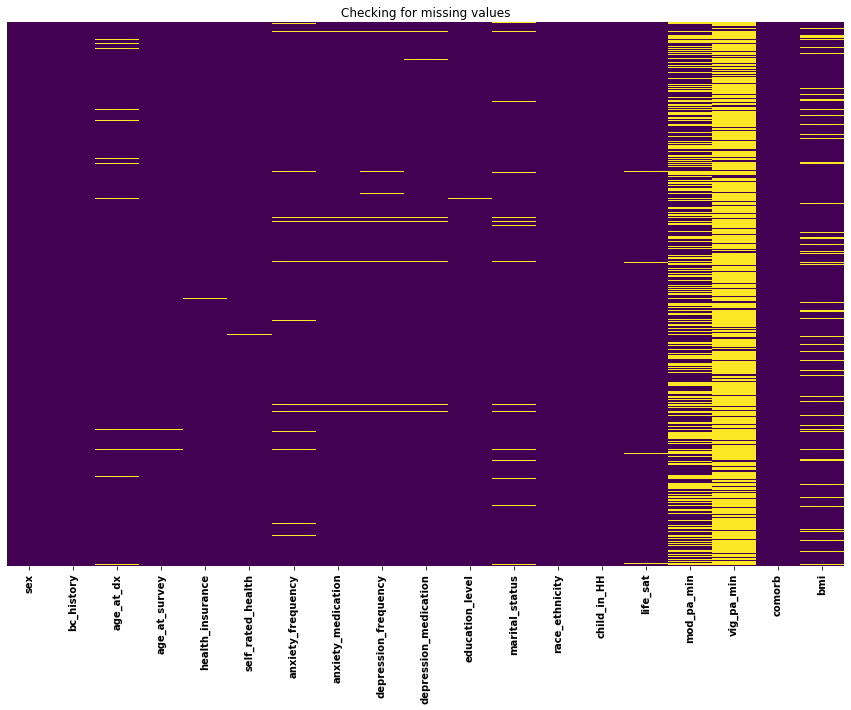

In [19]:
# plot a heatmap of missing values
plt.figure(figsize= (15, 10))
sns.heatmap(nhis_bc_only.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)
plt.title('Checking for missing values')

Too many missing values in, seems to be highest in vigorous physical activity. Remove this variable

In [20]:
nhis_bc_only = nhis_bc_only.drop(columns='vig_pa_min')

<AxesSubplot:>

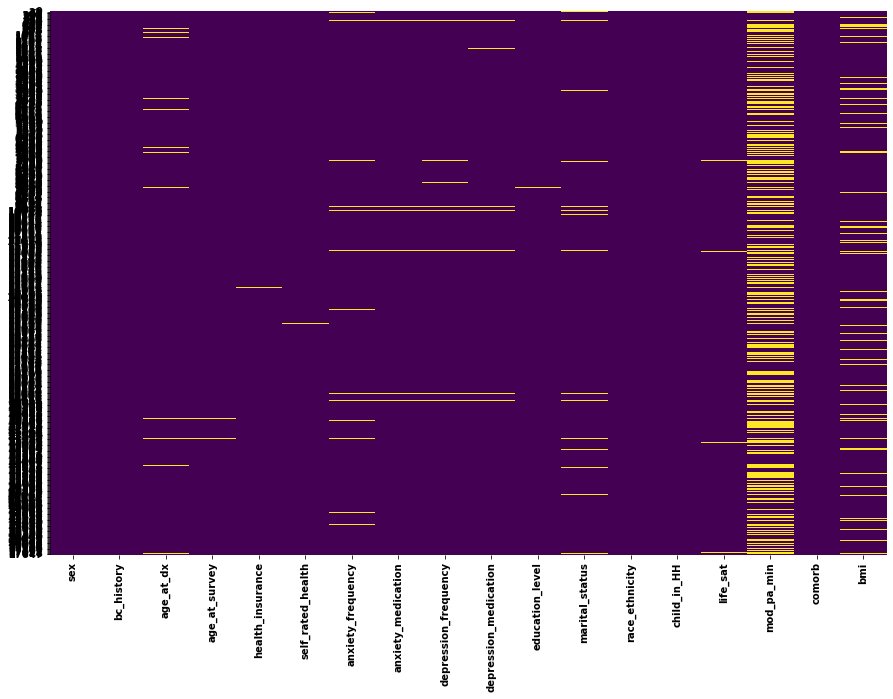

In [21]:
# Rerun the missingness check
plt.figure(figsize= (15,10))
sns.heatmap(nhis_bc_only.isnull(), cmap='viridis', cbar=False, yticklabels=True)

Still a lot of missing values, especially in the moderate physical activity variable. Drop the variable, then remove rows with missing values

In [22]:
#drop variable
nhis_bc_only = nhis_bc_only.drop(columns='mod_pa_min')

In [23]:
#remove rows with missing obs
nhis_bc_only = nhis_bc_only.dropna(axis=0)

Text(0.5, 1.0, 'Check for missingness, after dropping missing obs')

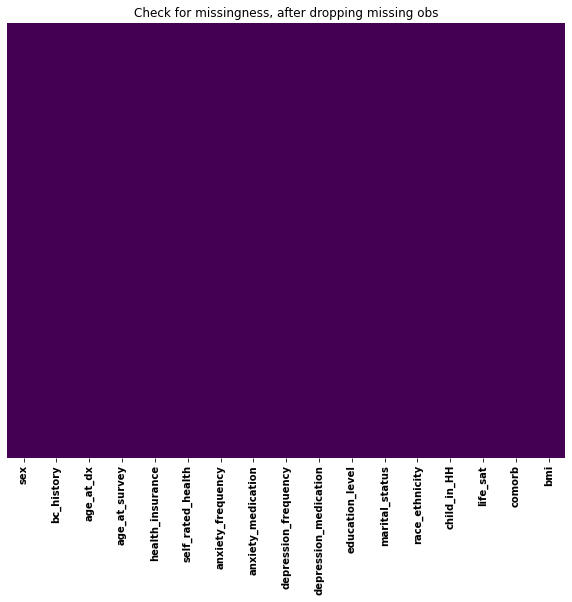

In [24]:
plt.figure(figsize= (10,8))
sns.heatmap(nhis_bc_only.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Check for missingness, after dropping missing obs')

All missing values removed. 

In [25]:
print('The new, cleaned data has', nhis_bc_only.shape[0], 'rows.')

The new, cleaned data has 539 rows.


#### Correlation

Text(0.5, 1.0, 'Pairwise correlation of all quantitative variables')

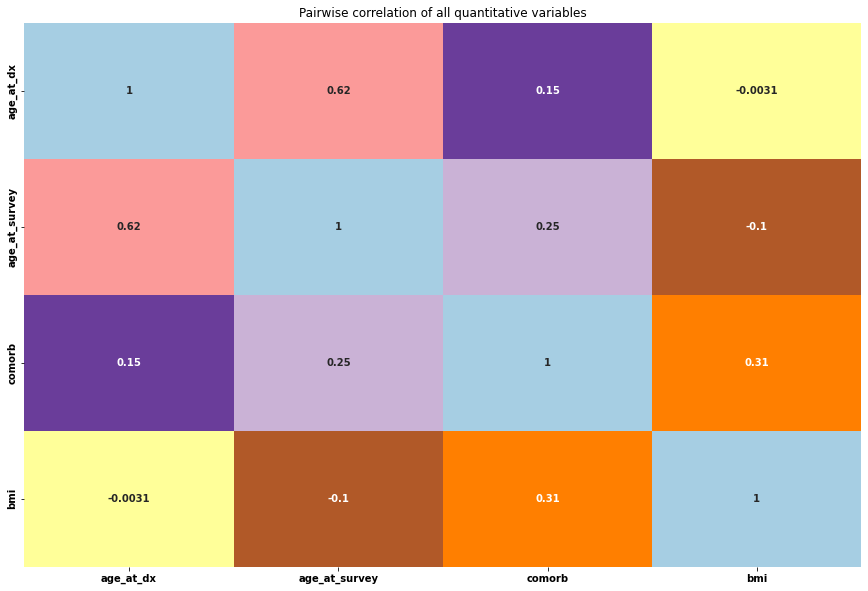

In [26]:
#obtain pairwise correlation of only quant variables
plt.figure(figsize = (15, 10))
sns.heatmap(nhis_bc_only.corr(), cmap = "Paired_r", annot = True, cbar = False)
plt.title("Pairwise correlation of all quantitative variables")

Text(0.5, 1.0, 'Graph of age at diagnosis vs. BMI')

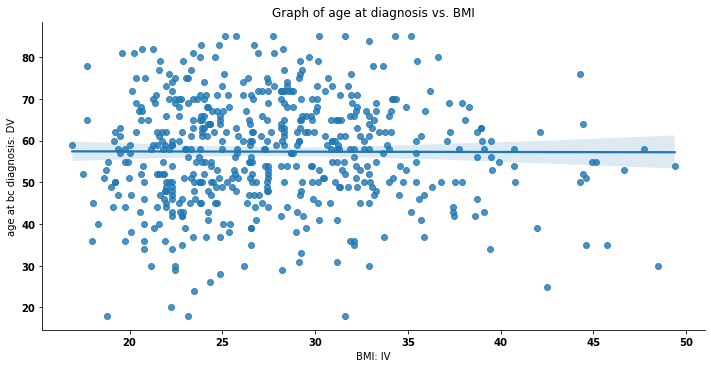

In [27]:
# create a linear plot (regression graph) of age at diagnosis against BMI
sns.lmplot(x = 'bmi', y = 'age_at_dx', data = nhis_bc_only, aspect = 2, height = 5)
plt.xlabel('BMI: IV')
plt.ylabel("age at bc diagnosis: DV")
plt.title("Graph of age at diagnosis vs. BMI")

#### Univariate plots (for DV: age at diagnosis)

Text(0.5, 1.0, 'Univariate/Gaussian distribution of age at diagnosis')

<Figure size 720x576 with 0 Axes>

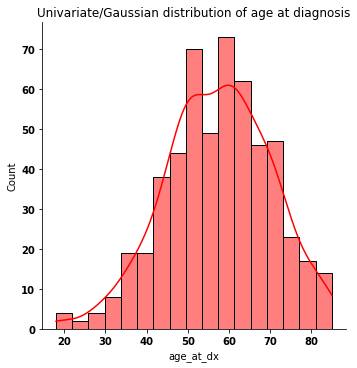

In [28]:
plt.figure(figsize=(10, 8))
sns.displot(nhis_bc_only['age_at_dx'], color='red', kde=True)
plt.title('Univariate/Gaussian distribution of age at diagnosis')

The plot is roughly normal. Check the distribution of the log conversion of the DV

Text(0.5, 1.0, 'Gaussian distributon of log of age at diagnosis')

<Figure size 720x5760 with 0 Axes>

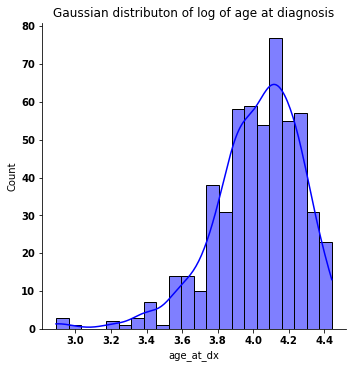

In [29]:
plt.figure(figsize= (10,80))
sns.displot(np.log(nhis_bc_only['age_at_dx']), kde=True, color='blue')
plt.title('Gaussian distributon of log of age at diagnosis')

The log conversion seems to perform even worse: left-skewed. Test different root transformations of the DV.

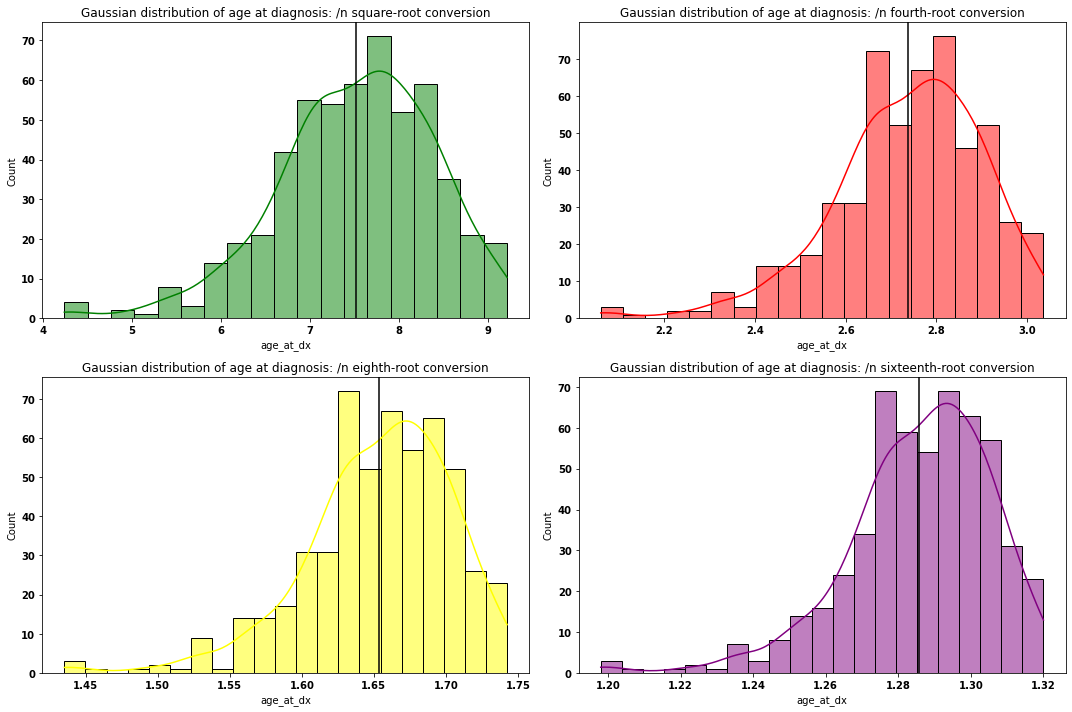

In [30]:
b=plt.figure(figsize=(15,10))

ax1 = b.add_subplot(221)
sns.histplot(np.sqrt(nhis_bc_only['age_at_dx']), kde=True, color='green', ax=ax1)
ax1.axvline(np.sqrt(nhis_bc_only['age_at_dx']).mean(), color='black')
ax1.set_title('Gaussian distribution of age at diagnosis: /n square-root conversion')

ax2=b.add_subplot(222)
sns.histplot(np.sqrt(np.sqrt(nhis_bc_only['age_at_dx'])), kde=True, color='red', ax=ax2)
ax2.axvline(np.sqrt(np.sqrt(nhis_bc_only['age_at_dx'])).mean(), color='black')
ax2.set_title('Gaussian distribution of age at diagnosis: /n fourth-root conversion')

ax3=b.add_subplot(223)
sns.histplot(np.sqrt(np.sqrt(np.sqrt(nhis_bc_only['age_at_dx']))), kde=True, color='yellow')
ax3.axvline(np.sqrt(np.sqrt(np.sqrt(nhis_bc_only['age_at_dx']))).mean(), color='black')
ax3.set_title('Gaussian distribution of age at diagnosis: /n eighth-root conversion')

ax4=b.add_subplot(224)
sns.histplot(np.sqrt(np.sqrt(np.sqrt(np.sqrt(nhis_bc_only['age_at_dx'])))), kde=True, color='purple')
ax4.axvline(np.sqrt(np.sqrt(np.sqrt(np.sqrt(nhis_bc_only['age_at_dx'])))).mean(), color='black')
ax4.set_title('Gaussian distribution of age at diagnosis: /n sixteenth-root conversion')

b.tight_layout()

No better performance. Stick with the raw version of DV.

### Variable prep

#### Dummy-recode categorical IVs

In [31]:
#first, drop variables not neeeded in the model
others=['sex', 'bc_history', 'anxiety_frequency', 'anxiety_medication', 'depression_frequency', 'depression_medication', 'self_rated_health']
streamlined_data = nhis_bc_only.drop(columns=others)

In [32]:
finalized_data = pd.get_dummies(data=streamlined_data, columns=['health_insurance', 'education_level', 'marital_status', 'race_ethnicity', 
                                                            'child_in_HH', 'life_sat'], prefix='dum', prefix_sep='_',
                                                            dtype='int8')

In [33]:
#manually drop referent group for each variable
finalized_data.drop(['dum_insured', 'dum_GED/HS', 'dum_currently not married', 'dum_NHWhite', 'dum_no child', 'dum_satisfied'], axis=1,
                    inplace=True)

In [34]:
finalized_data.head(10)

,age_at_dx,age_at_survey,comorb,bmi,dum_uninsured,dum_college degree,dum_graduate degree,dum_less than HS,dum_some college,dum_currently married,dum_Hispanic,dum_NHAsian,dum_NHBlack,dum_Others,dum_1 child,dum_2 ch or more,dum_dissatisfied,dum_v. dissatisfied,dum_v. satisfied
52,62.0,83.0,1.0,25.176309,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
83,65.0,66.0,3.0,29.177246,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
198,44.0,65.0,0.0,21.963550,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
207,58.0,80.0,3.0,24.995556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
208,48.0,53.0,2.0,25.744629,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
287,60.0,82.0,3.0,19.134911,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
312,52.0,58.0,0.0,21.453857,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
383,41.0,62.0,4.0,35.727725,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
439,70.0,81.0,4.0,22.755510,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
478,61.0,63.0,3.0,21.611495,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


#### Train-Test split

In [35]:
from sklearn.model_selection import train_test_split as tts

In [36]:
x=finalized_data.drop('age_at_dx', axis=1) #IV=all variables except the DV
y=finalized_data['age_at_dx'] #DV

In [37]:
#Split the data
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3, random_state = 37)

### Model Building

#### Using the normal equation for linear regression

In [38]:
#First, add a feature x0=1 to the feauture (i.e., IV) dataset
x_test_0 = np.c_[np.ones((x_test.shape[0], 1)), x_test]
x_train_0 = np.c_[np.ones((x_train.shape[0], 1)), x_train]

Next, build model using the linear regression equation $θ = (X^TX)^{-1}X^Ty$:

In [39]:
theta = np.matmul(np.linalg.inv(np.matmul(x_train_0.T, x_train_0)), np.matmul(x_train_0.T, y_train))

In [45]:
theta

array([ 4.88542882,  0.72009512, -0.31268582,  0.11127528, -4.89012023,
       -0.18848449,  0.58166395, -0.35113438,  0.10140044, -0.25135464,
        1.29131671, -3.64684673, -1.34485504,  3.80834913, -0.68943992,
        1.04669627, -1.15768048, -5.33204969, -0.01790002])

In [40]:
# Name the parameters for the linear regression
parameter = ['theta_' + str(i) for i in range(x_train_0.shape[1])]
parameter

['theta_0',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4',
 'theta_5',
 'theta_6',
 'theta_7',
 'theta_8',
 'theta_9',
 'theta_10',
 'theta_11',
 'theta_12',
 'theta_13',
 'theta_14',
 'theta_15',
 'theta_16',
 'theta_17',
 'theta_18']

In [44]:
# obtain the column names
attributes = ['intercept: x0=1'] + list(x.columns.values)
attributes

['intercept: x0=1',
 'age_at_survey',
 'comorb',
 'bmi',
 'dum_uninsured',
 'dum_college degree',
 'dum_graduate degree',
 'dum_less than HS',
 'dum_some college',
 'dum_currently married',
 'dum_Hispanic',
 'dum_NHAsian',
 'dum_NHBlack',
 'dum_Others',
 'dum_1 child',
 'dum_2 ch or more',
 'dum_dissatisfied',
 'dum_v. dissatisfied',
 'dum_v. satisfied']

In [46]:
#Arrange all three in a dataframe
constants_df = pd.DataFrame({'Constant':parameter, 'Variable': attributes, 'Value': theta})
constants_df

,Constant,Variable,Value
0,theta_0,intercept: x0=1,4.885429
1,theta_1,age_at_survey,0.720095
2,theta_2,comorb,-0.312686
3,theta_3,bmi,0.111275
4,theta_4,dum_uninsured,-4.890120
5,theta_5,dum_college degree,-0.188484
6,theta_6,dum_graduate degree,0.581664
7,theta_7,dum_less than HS,-0.351134
8,theta_8,dum_some college,0.101400
9,theta_9,dum_currently married,-0.251355


#### Using the skicit-learn's linear regression module

This can be used to verify the theta values from the normal equation approach

In [47]:
# import linear regression function
from sklearn.linear_model import LinearRegression

In [48]:
# Fit the linear regression model to the training data:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# NB: the datasets containing the intercept (x0=1) is not used; sklearn's lin reg module handles this by default.

LinearRegression()

In [49]:
# Next, calculate theta values
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
sk_theta

[4.885428815093576,
 0.7200951230623672,
 -0.3126858199220567,
 0.1112752834846118,
 -4.8901202314748335,
 -0.18848448845538726,
 0.5816639450496317,
 -0.35113438371581346,
 0.10140043510312859,
 -0.25135463801035285,
 1.29131670624417,
 -3.646846728127051,
 -1.3448550350170658,
 3.808349131022896,
 -0.6894399164495286,
 1.0466962740255474,
 -1.1576804796376996,
 -5.3320496926571845,
 -0.01790001787906335]

In [50]:
# check the new parameters against the previous ones:
check_df = pd.DataFrame({'Constant':parameter, 'Variable': attributes, 'Value': theta, 'sk_theta': sk_theta})
check_df

,Constant,Variable,Value,sk_theta
0,theta_0,intercept: x0=1,4.885429,4.885429
1,theta_1,age_at_survey,0.720095,0.720095
2,theta_2,comorb,-0.312686,-0.312686
3,theta_3,bmi,0.111275,0.111275
4,theta_4,dum_uninsured,-4.890120,-4.890120
5,theta_5,dum_college degree,-0.188484,-0.188484
6,theta_6,dum_graduate degree,0.581664,0.581664
7,theta_7,dum_less than HS,-0.351134,-0.351134
8,theta_8,dum_some college,0.101400,0.101400
9,theta_9,dum_currently married,-0.251355,-0.251355


Everything lines up!

### Model Evaluation

#### Using the normal equation approach

Calculate predicted $\hat{y}$, MSE, and $R^2$

In [51]:
#predicted y = x * theta
y_pred_norm = np.matmul(x_test_0, theta)

In [52]:
#MSE
mse = np.sum((y_pred_norm - y_test)**2) / x_test_0.shape[0]

In [53]:
# sse (sum of square error) = sum((y_hat - y_i)^2)
sse = np.sum((y_pred_norm - y_test)**2)

# sst (sum of square total) = sum((y_i - y_bar)^2)
sst = np.sum((y_test - y_test.mean())**2)

R_squared = 1 - (sse/sst)

In [54]:
print('The mean square error for the normal method is', mse)
print('The R_squared for the normal method is ' + str(R_squared))

The mean square error for the normal method is 87.39720129592689
The R_squared for the normal method is 0.41828413170931067


#### Using the sklearn module

In [55]:
# Calculate y_hat (predicted y)
y_pred_sk = lin_reg.predict(x_test)

In [56]:
# Calculate MSE
from sklearn.metrics import mean_squared_error
mse_sk = mean_squared_error(y_pred_sk, y_test)

In [58]:
# Calculate R_squared
R_squared_sk = lin_reg.score(x_test, y_test)

In [59]:
print('The MSE from the sklearn approach is ' + str(mse_sk))
print('The R_squared from the sklearn approach is', R_squared_sk)

The MSE from the sklearn approach is 87.39720129592729
The R_squared from the sklearn approach is 0.418284131709308


The values match up. Although the R-value (41.8%) isn't exactly great, it may be reasonable considering that the DV (age at breast cancer diagnosis) is dependent on other factors such as regularity of screening/mammogram (which is not accounted for in the current data), which is in turn influenced by other factors (e.g., support system, perception/norms/etc regarding screening), which are also not measured in the current data

### Model Validation

Checking the assumptions of linear regression:

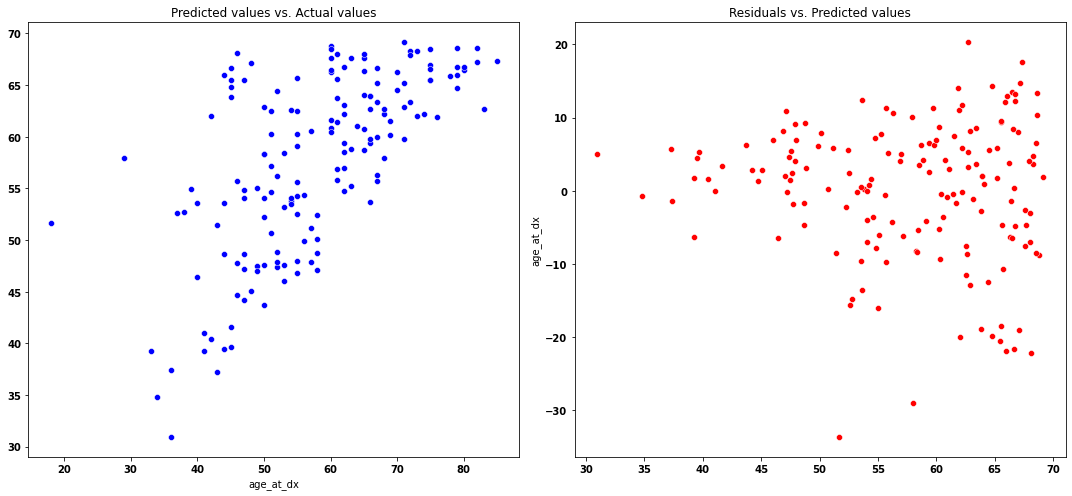

In [66]:
j = plt.figure(figsize = (15, 7))

# 1. Check for linearity: Plot a scatterplot of y_hat against y
ax5 = j.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, color = 'blue', ax = ax5)
ax5.set_title('Predicted values vs. Actual values')

# 2. Check for homoscedasticity: Plot a scatterplot of residual (y - y_hat) against y_hat
ax6 = j.add_subplot(122)
sns.scatterplot(x=y_pred_sk, y=(y_test - y_pred_sk), color = 'red', ax = ax6)
ax6.set_title('Residuals vs. Predicted values')

j.tight_layout()

Plot 1 (Linearity check): a non-linear relationship is depicted, so this assumption may be violated. <br>
Plot 2 (Homoscedasticity check): the plot is heteroscedastic (i.e., the error/residual varies). This assumption also appears violated.

Text(0.5, 1.0, 'Residual normality and mean')

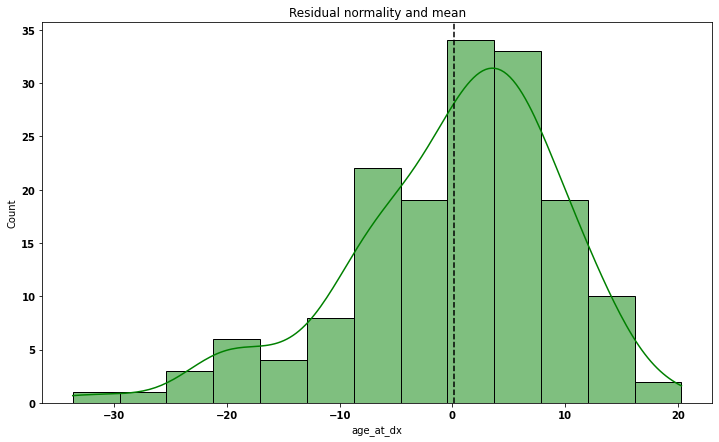

In [72]:
# 3. Check for residual's normality (should be normal) and mean (should be 0)
plt.figure(figsize = (12, 7))
sns.histplot((y_test - y_pred_sk), color = 'green', kde=True)
plt.axvline((y_test - y_pred_sk).mean(), color = 'black', linestyle = '--')
plt.title('Residual normality and mean')

The plot is negatively skewed but the mean is approximately 0. Assumption appears partially violated.

Text(0.5, 1.0, 'Check for multivariate normality: \nthe Q-Q plot')

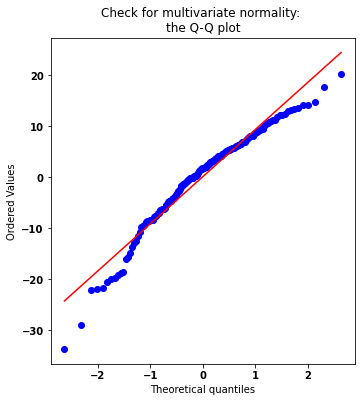

In [74]:
# 4. Check for multivariate normality: the Q-Q plot
z = plt.figure(figsize = (12, 6))

import scipy as sp
ax = z.add_subplot(121)
_,(_,_,r) = sp.stats.probplot((y_test - y_pred_sk), fit = True, plot = ax)
plt.title('Check for multivariate normality: \nthe Q-Q plot')

In [75]:
# 5. Check for multicollinearity
VIF = 1/(1 - R_squared_sk)
VIF

1.7190522977108909

VIF is <5. So there seems to be no multicollinearity problem